In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.image as mpimg
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout, Conv2D,Flatten
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.layers import Reshape
from tensorflow.keras.layers import LSTM



from IPython.display import SVG,Image
import tensorflow as tf
print("tensorflow version:",tf.__version__)


tensorflow version: 2.16.1


In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(r"C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory(r"C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
   # x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)
    #x = Dropout(0.25)(x)
    
    return x

In [8]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
   # conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_2)
    reshape = Reshape((1, -1))(flatten)  
    print(flatten.shape)
    lstm_1 = LSTM(units=128 , return_sequences =True)(reshape)
    lstm_2 = LSTM(units= 64 , return_sequences =False)(lstm_1)
    
    dense_1 = Dense_f(lstm_2,32)
    # dense_2 =Dense_f(dense_1,7)
    
    #dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = Adam(learning_rate=0.001) , metrics =["accuracy"])

    return model

In [9]:
model = model_fer((48,48,1))
model.summary()

(None, 9216)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 9216)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 128)              │       4,784,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,887,943 (18.65 MB)

 Trainable params: 4,887,943 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights1.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)

callbacks = [checkpoint]



In [55]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


C:\Users\Anjali\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.3044 - loss: 1.8462
Epoch 1: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.3045 - loss: 1.8458 - val_accuracy: 0.4067 - val_loss: 1.5347
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:09 424ms/step - accuracy: 0.4062 - loss: 1.4691

C:\Users\Anjali\anaconda3\Anjali1\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.4062 - loss: 0.7362 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.4576 - loss: 1.4294
Epoch 3: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 203s 452ms/step - accuracy: 0.4576 - loss: 1.4294 - val_accuracy: 0.4449 - val_loss: 1.4749
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:28 467ms/step - accuracy: 0.3281 - loss: 1.5307
Epoch 4: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.3281 - loss: 0.7671 - val_accuracy: 0.4000 - val_loss: 0.8759
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5086 - loss: 1.2762
Epoch 5: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 206s 458ms/step - accuracy: 0.5086 - loss: 1.2762 - val_accuracy: 0.4877 - val_loss: 1.3840
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:23 456m

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN-BiLSTM model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu', input_shape=(48, 48,1)))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='elu'))

# Bidirectional LSTM layer
model.add(layers.TimeDistributed(layers.Flatten()))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))

# Flatten the output from Bidirectional LSTM
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 emotion classes

# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Anjali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 6, 3072)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 6, 256)              │       3,277,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,159,687 (31.13 MB)

 Trainable params: 8,159,687 (31.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights1.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [ ]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


C:\Users\Anjali\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2373 - loss: 1.8310
Epoch 1: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.2373 - loss: 1.8310 - val_accuracy: 0.2469 - val_loss: 1.8217
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:28 467ms/step - accuracy: 0.2344 - loss: 1.9147
Epoch 2: saving model to model_weights1.weights.h5


C:\Users\Anjali\anaconda3\Anjali1\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.2344 - loss: 0.9595 - val_accuracy: 0.5000 - val_loss: 0.7877
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.2477 - loss: 1.8145
Epoch 3: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 200s 446ms/step - accuracy: 0.2477 - loss: 1.8145 - val_accuracy: 0.2471 - val_loss: 1.8158
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:48 511ms/step - accuracy: 0.2812 - loss: 1.7295
Epoch 4: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.2812 - loss: 0.8667 - val_accuracy: 0.4000 - val_loss: 0.8437
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2552 - loss: 1.8088
Epoch 5: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.2552 - loss: 1.8089 - val_accuracy: 0.2473 - val_loss: 1.8154
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:51 383ms/step - accuracy: 0.2500 - loss: 1.7504
Epoch 6: saving m

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

# Data Description

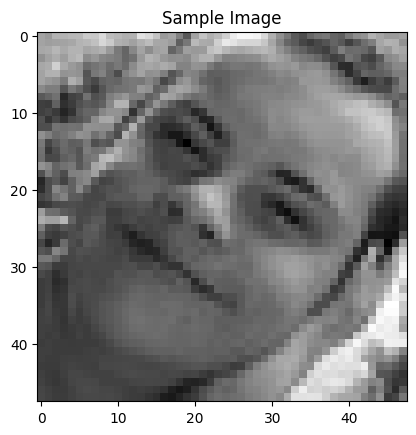

In [11]:
# Sample Image
image_path = "C:/Users/Anjali/Downloads/archive (1)/train/happy/Training_9925349.jpg"
img = mpimg.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title('Sample Image')
plt.show()

In [12]:
image_path = "C:/Users/Anjali/Downloads/archive (1)/train/happy/Training_9925349.jpg"
img = mpimg.imread(image_path)
img.shape

(48, 48)

# number of channels

In [13]:

image = cv2.imread("C:/Users/Anjali/Downloads/archive (1)/train/happy/Training_9925349.jpg")
image.shape[2] if len(image.shape) == 3 else 1

3

In [14]:
def plot_no_of_images(training_folder):
    categories = []
    image_counts = []

    for category in os.listdir(training_folder):
        category_path = os.path.join(training_folder, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_count = len(os.listdir(category_path))
            image_counts.append(image_count)

    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='royalblue', width=0.5)
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Category')
    plt.xticks(rotation=45, fontsize=10)
    plt.show()

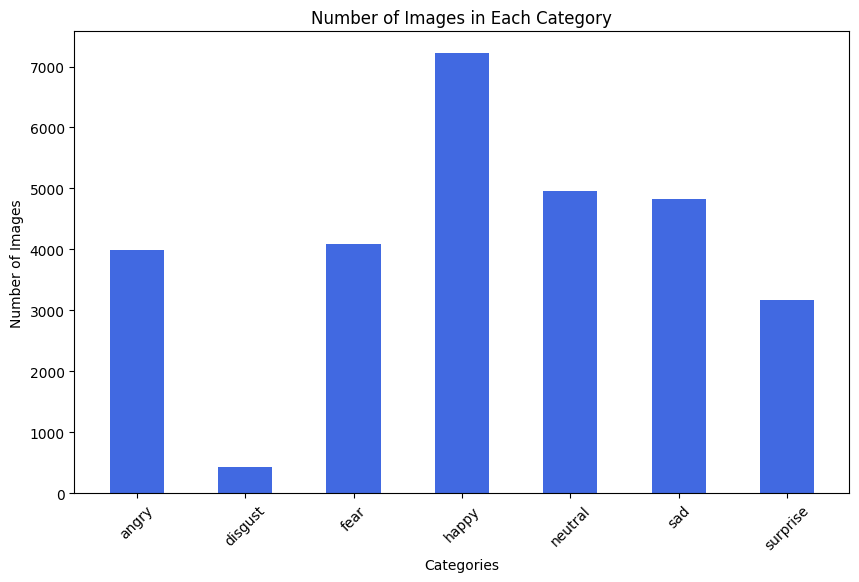

In [15]:
plot_no_of_images("C:/Users/Anjali/Downloads/archive (1)/train")

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','test'],loc = 'lower right')
#plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

NameError: name 'history' is not defined